# Making sense of connections and relationships

using networkx 

In [1]:
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

### Creating Nodes

In [2]:
g = nx.Graph()

In [3]:
# Create or Add A Node to the Graph
g.add_node("Obama")
g.add_node("Trump")

In [4]:
# Adding multiple nodes 
g.add_nodes_from(["Hillary","Michelle"])

### View Graph

In [5]:
g.nodes()

NodeView(('Obama', 'Trump', 'Hillary', 'Michelle'))

### Creating Edges or Relationships or Connections

In [6]:
g.add_edge("Obama","Michelle")
g.add_edge("Hillary","Clinton")
g.add_edge("Trump","Ivanka")
g.add_edge("Trump","Clinton")# Presidential Election
g.add_edge("Obama","Mitt")# Presidential Election

In [7]:
### Adding Multiple relations
g.add_edges_from([("Hillary","Clinton"),("Obama","Trump"),("Obama","Clinton"),("Michelle","Ivanka"),("Michelle","Hillary")])

In [8]:
g.nodes()

NodeView(('Obama', 'Trump', 'Hillary', 'Michelle', 'Clinton', 'Ivanka', 'Mitt'))

In [9]:
# View Edges or Connections
g.edges()

EdgeView([('Obama', 'Michelle'), ('Obama', 'Mitt'), ('Obama', 'Trump'), ('Obama', 'Clinton'), ('Trump', 'Ivanka'), ('Trump', 'Clinton'), ('Hillary', 'Clinton'), ('Hillary', 'Michelle'), ('Michelle', 'Ivanka')])

### Info About Graph

In [10]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 7\nNumber of edges: 9\nAverage degree:   2.5714'

## Visualization of Graph

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


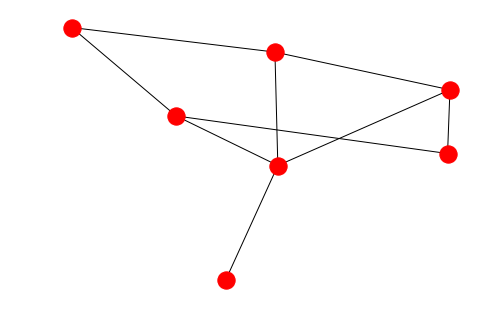

In [11]:
# without labels by default
nx.draw(g)

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


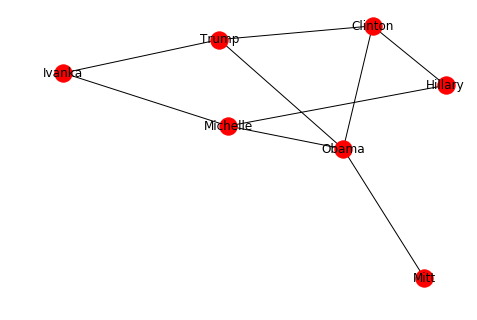

In [12]:
# with labels by setting it
nx.draw(g,with_labels=True)

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


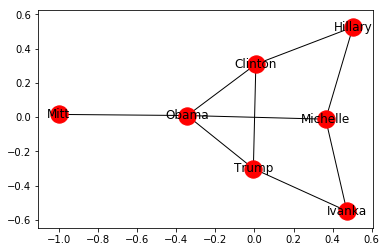

In [13]:
# Prints the names
nx.draw_networkx(g)

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


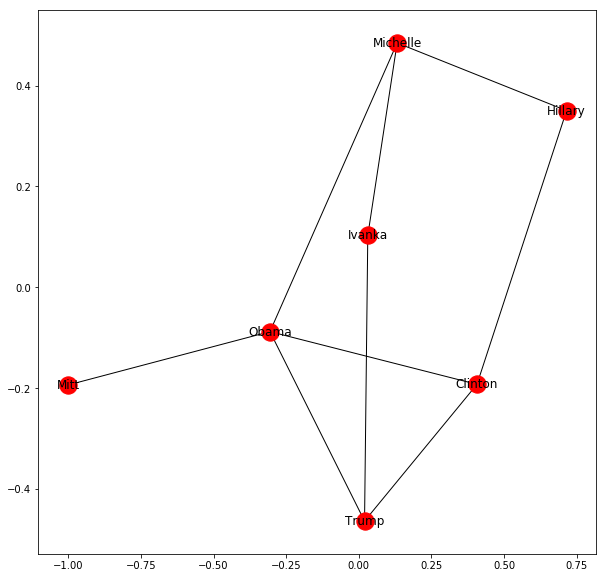

In [14]:
### Using Plt
plt.figure(figsize=(10,10))
nx.draw_networkx(g)
plt.show()

### Spring Layout

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


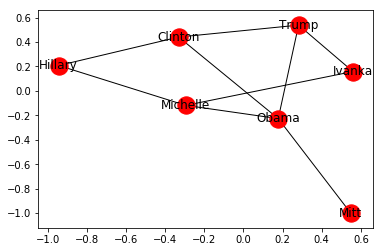

In [15]:
nx.spring_layout(g)
nx.draw_networkx(g)

### deeper analysis

Degree centrality

- Number of nodes and connections
- Who is the most influetial?

In [16]:
# How many people are connected to Obama
nx.degree(g,"Obama")

4

In [17]:
nx.degree(g,"Ivanka")

2

In [18]:
nx.degree(g,"Trump")

3

### Distance
We can also determine the shortest path between two nodes and its length in NetworkX using

- nx.shortest_path(Graph, Node1, Node2)
- nx.shortest_path_length(Graph, Node1, Node2)

In [19]:
# What is the shortest connection between Obama and Bill Clinton
nx.shortest_path(g,"Obama","Clinton")

['Obama', 'Clinton']

In [20]:
# What is the shortest connection between Mitt and Trump
nx.shortest_path(g,"Mitt","Ivanka")

['Mitt', 'Obama', 'Trump', 'Ivanka']

### Degree Centrality

- Most influential among them all
- Who is the most influetial?
- nx.degree_centrality(g)

In [21]:
nx.degree_centrality(g)

{'Obama': 0.6666666666666666,
 'Trump': 0.5,
 'Hillary': 0.3333333333333333,
 'Michelle': 0.5,
 'Clinton': 0.5,
 'Ivanka': 0.3333333333333333,
 'Mitt': 0.16666666666666666}

### Eigenvector Centrality

Most important connection

Do you know whom I am related to?

In [22]:
nx.eigenvector_centrality(g)

{'Obama': 0.5111280557355803,
 'Trump': 0.4391143447616207,
 'Hillary': 0.29205444292301985,
 'Michelle': 0.3871340482294738,
 'Clinton': 0.4391143447616206,
 'Ivanka': 0.29205444292301985,
 'Mitt': 0.18066800637749658}

### Betweeness Centrality

- Bridges /Betweener
- Destiny Helpers or Connectors
- Number of times a node is present in the shortest path between 2 other nodes
- nx.betweenness_centrality(g)

In [23]:
nx.betweenness_centrality(g)

{'Obama': 0.4,
 'Trump': 0.13333333333333333,
 'Hillary': 0.03333333333333333,
 'Michelle': 0.2,
 'Clinton': 0.13333333333333333,
 'Ivanka': 0.03333333333333333,
 'Mitt': 0.0}

### Predicting Associations

- Clusting Coefficient
- nx.clustering(Graph, Node)
- nx.average_clustering(g)

In [24]:
nx.clustering(g,"Obama")

0.16666666666666666

In [25]:
nx.average_clustering(g)

0.11904761904761904

# Example 1 :

Grey's Anatomy Dataset

In [26]:
df = pd.read_csv("ga_edgelist.csv")

In [27]:
df.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [28]:
df.shape

(34, 2)

In [29]:
type(df)

pandas.core.frame.DataFrame

### convert dataframe to networkx class

In [30]:
# creating network
greys = nx.from_pandas_edgelist(df,source="from",target="to")

In [31]:
greys

In [32]:
type(greys)

networkx.classes.graph.Graph

In [33]:
nx.info(greys)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 34\nAverage degree:   2.1250'

In [34]:
# Check For All Nodes/People/Objects
greys.nodes

NodeView(('lexi', 'sloan', 'karev', 'owen', 'yang', 'altman', 'torres', 'arizona', 'derek', 'grey', 'izzie', "o'malley", 'colin', 'preston', 'kepner', 'addison', 'nancy', 'olivia', 'mrs. seabury', 'chief', 'adele', 'ellis grey', 'thatch grey', 'susan grey', 'bailey', 'tucker', 'hank', 'denny', 'finn', 'steve', 'ben', 'avery'))

### Influences
Centrality Measures help us in identifying popularity, most liked, and biggest influencers within the network.
Degree Centrality<br>

- the number of connections a particular node has in the network.
Most popular people have many connections or friends<br>
degree_centrality()<br>
Eigenvector Centrality<br>

- The importance of the node
Type of people one is connected to<br>
eigenvector_centrality()<br>
eg Google Page Rank<br>

In [35]:
# Check For All Edges /Connections
greys.edges

EdgeView([('lexi', 'sloan'), ('lexi', 'karev'), ('lexi', 'avery'), ('sloan', 'torres'), ('sloan', 'altman'), ('sloan', 'addison'), ('sloan', 'nancy'), ('karev', 'torres'), ('karev', 'izzie'), ('karev', 'kepner'), ('karev', 'addison'), ('karev', 'olivia'), ('karev', 'mrs. seabury'), ('owen', 'yang'), ('owen', 'altman'), ('yang', 'colin'), ('yang', 'preston'), ('torres', 'arizona'), ('torres', "o'malley"), ('derek', 'grey'), ('derek', 'addison'), ('grey', "o'malley"), ('grey', 'finn'), ('grey', 'steve'), ('izzie', "o'malley"), ('izzie', 'hank'), ('izzie', 'denny'), ("o'malley", 'olivia'), ('chief', 'adele'), ('chief', 'ellis grey'), ('ellis grey', 'thatch grey'), ('thatch grey', 'susan grey'), ('bailey', 'tucker'), ('bailey', 'ben')])

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


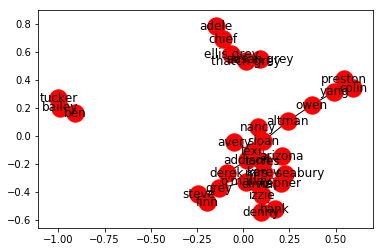

In [36]:
nx.draw_networkx(greys)

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


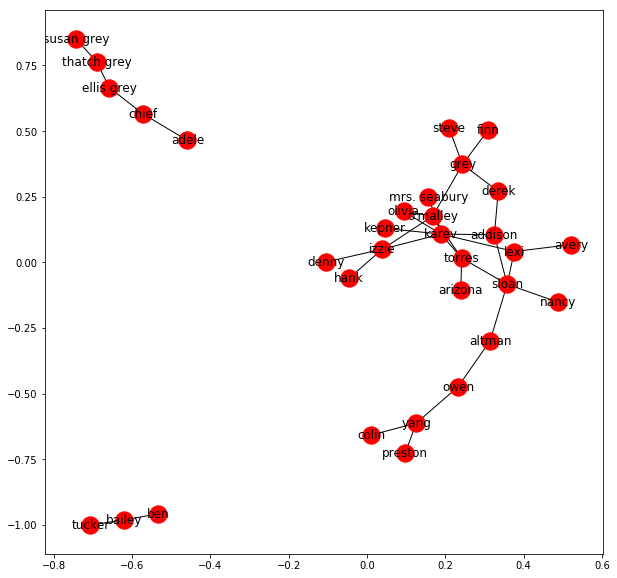

In [37]:
plt.figure(figsize=(10,10))
nx.draw_networkx(greys)
plt.show()

## Analysis

In [38]:
# General connection's degree
nx.degree(greys)

DegreeView({'lexi': 3, 'sloan': 5, 'karev': 7, 'owen': 2, 'yang': 3, 'altman': 2, 'torres': 4, 'arizona': 1, 'derek': 2, 'grey': 4, 'izzie': 4, "o'malley": 4, 'colin': 1, 'preston': 1, 'kepner': 1, 'addison': 3, 'nancy': 1, 'olivia': 2, 'mrs. seabury': 1, 'chief': 2, 'adele': 1, 'ellis grey': 2, 'thatch grey': 2, 'susan grey': 1, 'bailey': 2, 'tucker': 1, 'hank': 1, 'denny': 1, 'finn': 1, 'steve': 1, 'ben': 1, 'avery': 1})

In [39]:
# How many people are connected to Dr Grey
nx.degree(greys,"grey")

4

In [40]:
# Neighbours
greys.neighbors("grey")

In [41]:
# All Neighbours
nx.all_neighbors(greys,"grey")

### Building A Subgroup

In [42]:
new_group = nx.bfs_tree(greys, "grey")

In [43]:
new_group.nodes

NodeView(('grey', 'derek', "o'malley", 'finn', 'steve', 'addison', 'izzie', 'torres', 'olivia', 'sloan', 'karev', 'hank', 'denny', 'arizona', 'lexi', 'altman', 'nancy', 'kepner', 'mrs. seabury', 'avery', 'owen', 'yang', 'colin', 'preston'))

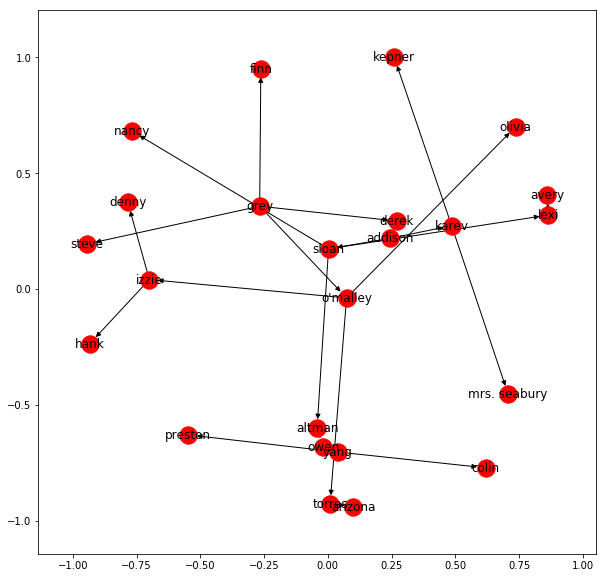

In [44]:
plt.figure(figsize=(10,10))
nx.draw_networkx(new_group)
plt.show()

In [45]:
# Number of People in this new node
len(new_group.nodes)

24

In [46]:
# Find the List of All People Connected to Grey
nx.node_connected_component(greys,"grey")

{'addison',
 'altman',
 'arizona',
 'avery',
 'colin',
 'denny',
 'derek',
 'finn',
 'grey',
 'hank',
 'izzie',
 'karev',
 'kepner',
 'lexi',
 'mrs. seabury',
 'nancy',
 "o'malley",
 'olivia',
 'owen',
 'preston',
 'sloan',
 'steve',
 'torres',
 'yang'}

In [47]:
# Same as the number Above
len(nx.node_connected_component(greys,"grey"))

24

### Most Influential

In [48]:
nx.degree_centrality(greys)

{'lexi': 0.0967741935483871,
 'sloan': 0.16129032258064516,
 'karev': 0.22580645161290322,
 'owen': 0.06451612903225806,
 'yang': 0.0967741935483871,
 'altman': 0.06451612903225806,
 'torres': 0.12903225806451613,
 'arizona': 0.03225806451612903,
 'derek': 0.06451612903225806,
 'grey': 0.12903225806451613,
 'izzie': 0.12903225806451613,
 "o'malley": 0.12903225806451613,
 'colin': 0.03225806451612903,
 'preston': 0.03225806451612903,
 'kepner': 0.03225806451612903,
 'addison': 0.0967741935483871,
 'nancy': 0.03225806451612903,
 'olivia': 0.06451612903225806,
 'mrs. seabury': 0.03225806451612903,
 'chief': 0.06451612903225806,
 'adele': 0.03225806451612903,
 'ellis grey': 0.06451612903225806,
 'thatch grey': 0.06451612903225806,
 'susan grey': 0.03225806451612903,
 'bailey': 0.06451612903225806,
 'tucker': 0.03225806451612903,
 'hank': 0.03225806451612903,
 'denny': 0.03225806451612903,
 'finn': 0.03225806451612903,
 'steve': 0.03225806451612903,
 'ben': 0.03225806451612903,
 'avery': 0.

In [49]:
# Sort them
most_influential = nx.degree_centrality(greys)

In [50]:
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])

karev 0.22580645161290322
sloan 0.16129032258064516
torres 0.12903225806451613
grey 0.12903225806451613
izzie 0.12903225806451613
o'malley 0.12903225806451613
lexi 0.0967741935483871
yang 0.0967741935483871
addison 0.0967741935483871
owen 0.06451612903225806
altman 0.06451612903225806
derek 0.06451612903225806
olivia 0.06451612903225806
chief 0.06451612903225806
ellis grey 0.06451612903225806
thatch grey 0.06451612903225806
bailey 0.06451612903225806
arizona 0.03225806451612903
colin 0.03225806451612903
preston 0.03225806451612903
kepner 0.03225806451612903
nancy 0.03225806451612903
mrs. seabury 0.03225806451612903
adele 0.03225806451612903
susan grey 0.03225806451612903
tucker 0.03225806451612903
hank 0.03225806451612903
denny 0.03225806451612903
finn 0.03225806451612903
steve 0.03225806451612903
ben 0.03225806451612903
avery 0.03225806451612903


# Example 2

US Election candidates

In [51]:
df = pd.read_csv("us_edgelist.csv")

In [52]:
df.head()

,From,To
0,Clinton,Hillary
1,Bush,Laura
2,Obama,Michelle
3,Trump,Ivanka
4,Clinton,G.Bush


In [53]:
df.shape

(21, 2)

In [54]:
type(df)

pandas.core.frame.DataFrame

In [55]:
# Read Our Edgelist
us_graph = nx.from_pandas_edgelist(df,source="From",target="To")

In [56]:
type(us_graph)

networkx.classes.graph.Graph

In [57]:
nx.info(us_graph)

'Name: \nType: Graph\nNumber of nodes: 19\nNumber of edges: 21\nAverage degree:   2.2105'

In [58]:
# Check All Nodes/Object/People
us_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy'))

In [59]:
len(us_graph.nodes())

19

### Check connection/ Edges

In [60]:
len(us_graph.edges())

21

In [61]:
# add two more
us_graph.add_edge("Franklin","Lincoln")

In [62]:
us_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy', 'Franklin', 'Lincoln'))

### Visualization

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


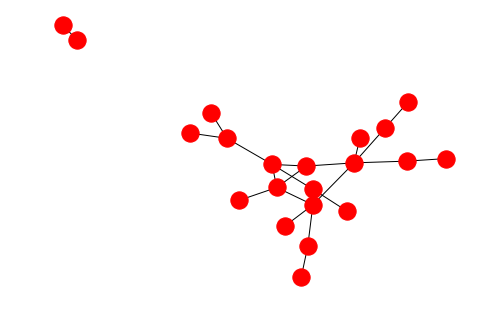

In [63]:
nx.draw(us_graph)

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


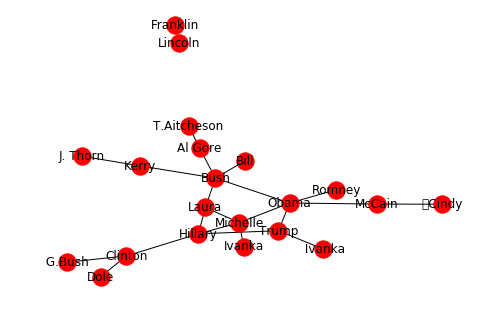

In [64]:
nx.draw(us_graph,with_labels=True)

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


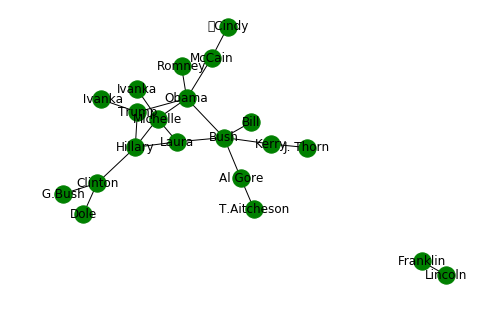

In [65]:
nx.draw(us_graph,with_labels=True,node_color='g')

### alternative approach

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


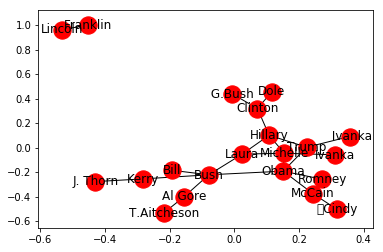

In [66]:
nx.draw_networkx(us_graph)

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


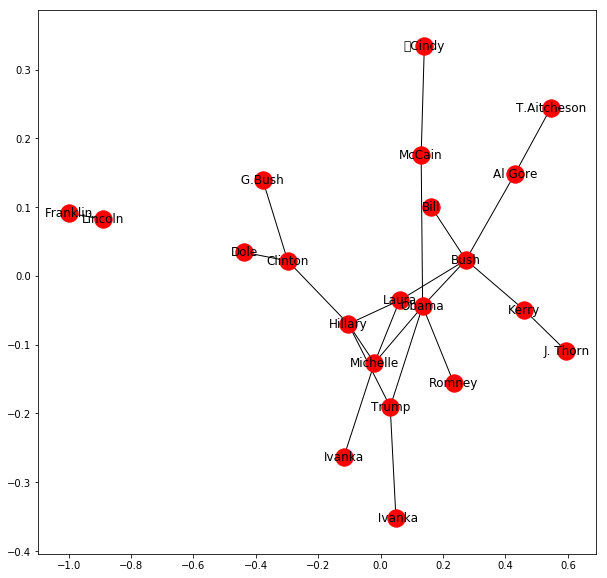

In [67]:
plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

### Analysis

- Degree of Centrality
- Most Influential
- Most important connection
- Best betweener
- Shortest Path

In [68]:
# General Connection
nx.degree(us_graph)

DegreeView({'Clinton': 3, 'Hillary': 4, 'Bush': 5, 'Laura': 3, 'Obama': 5, 'Michelle': 4, 'Trump': 3, ' Ivanka': 1, ' G.Bush ': 1, 'Dole': 1, 'Al Gore': 2, 'Kerry': 2, 'McCain': 2, 'Romney': 1, 'Bill': 1, 'Ivanka': 1, 'J. Thorn': 1, 'T.Aitcheson': 1, '\tCindy': 1, 'Franklin': 1, 'Lincoln': 1})

In [69]:
# Degree of Connection 
nx.degree(us_graph,"Obama")

5

In [70]:
nx.degree(us_graph,"Lincoln")

1

### Most Influential

In [71]:
nx.degree_centrality(us_graph)

{'Clinton': 0.15000000000000002,
 'Hillary': 0.2,
 'Bush': 0.25,
 'Laura': 0.15000000000000002,
 'Obama': 0.25,
 'Michelle': 0.2,
 'Trump': 0.15000000000000002,
 ' Ivanka': 0.05,
 ' G.Bush ': 0.05,
 'Dole': 0.05,
 'Al Gore': 0.1,
 'Kerry': 0.1,
 'McCain': 0.1,
 'Romney': 0.05,
 'Bill': 0.05,
 'Ivanka': 0.05,
 'J. Thorn': 0.05,
 'T.Aitcheson': 0.05,
 '\tCindy': 0.05,
 'Franklin': 0.05,
 'Lincoln': 0.05}

In [72]:
sorted(nx.degree_centrality(us_graph).values())

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.1,
 0.1,
 0.1,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.2,
 0.2,
 0.25,
 0.25]

In [73]:
# Sort them
most_influential = nx.degree_centrality(us_graph)

In [74]:
for q in sorted(most_influential, key=most_influential.get, reverse=True):
    print(q, most_influential[q])

Bush 0.25
Obama 0.25
Hillary 0.2
Michelle 0.2
Clinton 0.15000000000000002
Laura 0.15000000000000002
Trump 0.15000000000000002
Al Gore 0.1
Kerry 0.1
McCain 0.1
 Ivanka 0.05
 G.Bush  0.05
Dole 0.05
Romney 0.05
Bill 0.05
Ivanka 0.05
J. Thorn 0.05
T.Aitcheson 0.05
	Cindy 0.05
Franklin 0.05
Lincoln 0.05


### Most Important Connection

In [75]:
nx.eigenvector_centrality(us_graph)

{'Clinton': 0.15152928713724503,
 'Hillary': 0.38442159441543317,
 'Bush': 0.3696180606401399,
 'Laura': 0.36852963127385646,
 'Obama': 0.4266565483896092,
 'Michelle': 0.41352797669954305,
 'Trump': 0.28433452527063385,
 ' Ivanka': 0.08974661863249653,
 ' G.Bush ': 0.04782770964575167,
 'Dole': 0.04782770964575167,
 'Al Gore': 0.12957724264199433,
 'Kerry': 0.12957724264199433,
 'McCain': 0.14957130173861363,
 'Romney': 0.13466969692277045,
 'Bill': 0.11666706333937449,
 'Ivanka': 0.13052504916898053,
 'J. Thorn': 0.04090043619100648,
 'T.Aitcheson': 0.04090043619100648,
 '\tCindy': 0.047210688306275804,
 'Franklin': 6.994359082336066e-10,
 'Lincoln': 6.994359082336066e-10}

In [76]:
most_important_link = nx.eigenvector_centrality(us_graph)

In [77]:
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])

Obama 0.4266565483896092
Michelle 0.41352797669954305
Hillary 0.38442159441543317
Bush 0.3696180606401399
Laura 0.36852963127385646
Trump 0.28433452527063385
Clinton 0.15152928713724503
McCain 0.14957130173861363
Romney 0.13466969692277045
Ivanka 0.13052504916898053
Al Gore 0.12957724264199433
Kerry 0.12957724264199433
Bill 0.11666706333937449
 Ivanka 0.08974661863249653
 G.Bush  0.04782770964575167
Dole 0.04782770964575167
	Cindy 0.047210688306275804
J. Thorn 0.04090043619100648
T.Aitcheson 0.04090043619100648
Franklin 6.994359082336066e-10
Lincoln 6.994359082336066e-10


### Shortest path

In [78]:
nx.shortest_path

<function networkx.algorithms.shortest_paths.generic.shortest_path(G, source=None, target=None, weight=None, method='dijkstra')>

In [79]:
nx.shortest_path(us_graph,"Obama","Clinton")

['Obama', 'Trump', 'Hillary', 'Clinton']

In [80]:
nx.shortest_path(us_graph,"Trump","Bush")

['Trump', 'Obama', 'Bush']

In [81]:
nx.shortest_path(us_graph,"Ivanka","Laura")

['Ivanka', 'Michelle', 'Laura']

### Betweener Centrality

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


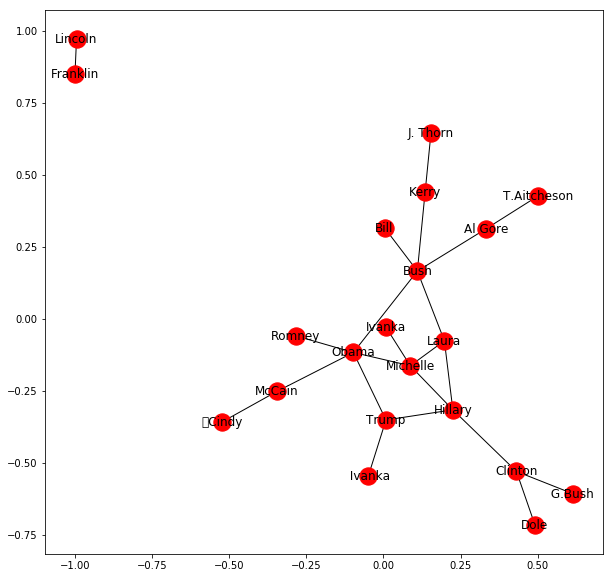

In [82]:
plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

In [83]:
nx.betweenness_centrality(us_graph)

{'Clinton': 0.17368421052631577,
 'Hillary': 0.25789473684210523,
 'Bush': 0.39473684210526316,
 'Laura': 0.15789473684210525,
 'Obama': 0.3526315789473684,
 'Michelle': 0.14210526315789473,
 'Trump': 0.13157894736842105,
 ' Ivanka': 0.0,
 ' G.Bush ': 0.0,
 'Dole': 0.0,
 'Al Gore': 0.08947368421052632,
 'Kerry': 0.08947368421052632,
 'McCain': 0.08947368421052632,
 'Romney': 0.0,
 'Bill': 0.0,
 'Ivanka': 0.0,
 'J. Thorn': 0.0,
 'T.Aitcheson': 0.0,
 '\tCindy': 0.0,
 'Franklin': 0.0,
 'Lincoln': 0.0}

In [84]:
best_connector = nx.betweenness_centrality(us_graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

Bush 0.39473684210526316
Obama 0.3526315789473684
Hillary 0.25789473684210523
Clinton 0.17368421052631577
Laura 0.15789473684210525
Michelle 0.14210526315789473
Trump 0.13157894736842105
Al Gore 0.08947368421052632
Kerry 0.08947368421052632
McCain 0.08947368421052632
 Ivanka 0.0
 G.Bush  0.0
Dole 0.0
Romney 0.0
Bill 0.0
Ivanka 0.0
J. Thorn 0.0
T.Aitcheson 0.0
	Cindy 0.0
Franklin 0.0
Lincoln 0.0


### Building A Subgroup

 Breadth-first search

In [85]:
group1 = nx.bfs_tree(us_graph,"Obama")
group2 = nx.bfs_tree(us_graph,"Bush")
group3 = nx.bfs_tree(us_graph,"Hillary")

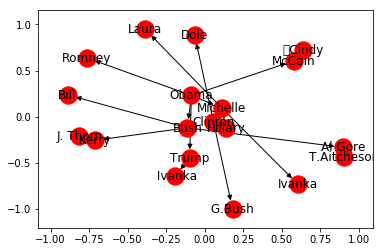

In [86]:
nx.draw_networkx(group1)

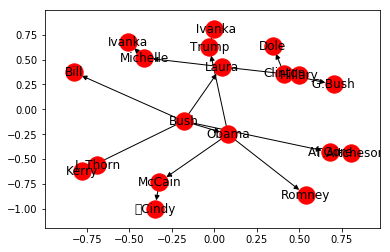

In [87]:
nx.draw_networkx(group2)

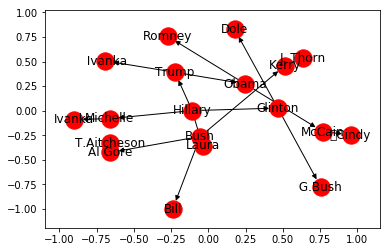

In [88]:
nx.draw_networkx(group3)

### nx.node_connected_component(G,n) method

In [89]:
nx.node_connected_component(us_graph,"Trump")

{'\tCindy',
 ' G.Bush ',
 ' Ivanka',
 'Al Gore',
 'Bill',
 'Bush',
 'Clinton',
 'Dole',
 'Hillary',
 'Ivanka',
 'J. Thorn',
 'Kerry',
 'Laura',
 'McCain',
 'Michelle',
 'Obama',
 'Romney',
 'T.Aitcheson',
 'Trump'}

### Association 

In [90]:
nx.clustering

<function networkx.algorithms.cluster.clustering(G, nodes=None, weight=None)>

In [91]:
nx.clustering(us_graph)

{'Clinton': 0,
 'Hillary': 0.16666666666666666,
 'Bush': 0,
 'Laura': 0.3333333333333333,
 'Obama': 0,
 'Michelle': 0.16666666666666666,
 'Trump': 0,
 ' Ivanka': 0,
 ' G.Bush ': 0,
 'Dole': 0,
 'Al Gore': 0,
 'Kerry': 0,
 'McCain': 0,
 'Romney': 0,
 'Bill': 0,
 'Ivanka': 0,
 'J. Thorn': 0,
 'T.Aitcheson': 0,
 '\tCindy': 0,
 'Franklin': 0,
 'Lincoln': 0}